In [21]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt       # чтобы выводить промежуточные фото в jupyter

# Список всех настроечных параметров/констант
WORK_DIR = 'pass_photos'
TEST_FILE = 'pass_photos/test.png'
TEST_FILE = 'pass_photos/1.jpeg'

In [22]:
# Функция для получения списка файлов из каталога с фотографиями (как в task_1 и task_2)
def get_files(directory: str) -> list:
    names = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpeg") or filename.endswith(".jpg") or filename.endswith(".png"):
            names.append(os.path.join(directory, filename))

    return names

In [26]:
def search_chars(image: str):    
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # преобразуем в ЧБ
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    # ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 2)
    
    # Morph open to remove noise and invert image
    #kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    #opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    #invert = 255 - opening
    
    # получаем контуры
    #contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    #output = img.copy()

    #for idx, contour in enumerate(contours):
    #    (x, y, w, h) = cv2.boundingRect(contour)
        # print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])
        # hierarchy[i][0]: следующий контур текущего уровня
        # hierarchy[i][1]: предыдущий контур текущего уровня
        # hierarchy[i][2]: первый вложенный элемент
        # hierarchy[i][3]: родительский элемент
    #    if hierarchy[0][idx][3] == 0:
    #        cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)


    #cv2.imshow("Input", img)
    # cv2.imshow("Output", output)
    #cv2.imshow("Gray", gray)
    #cv2.imshow("Blur", blur)
    #cv2.imshow("Thresh", thresh)
    cv2.imwrite(f'{image}.jpg', thresh)
    return thresh
    # cv2.imshow("Opening", opening)
    
    #cv2.waitKey(0)

In [27]:
passports = get_files(WORK_DIR)

In [4]:
# search_chars(TEST_FILE)

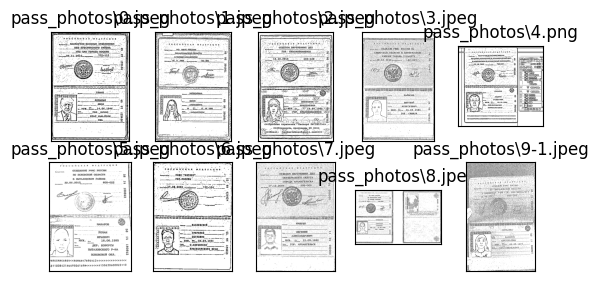

In [28]:
# Вывод результата обработки в таблицу
col = 5
for i, p in enumerate(passports):
    plt.subplot(len(passports)//col+1, col, i+1)
    # plt.figure(figsize=(1, 2.5))
    plt.imshow(search_chars(p), 'gray')
    plt.title(p)
    plt.xticks([]),plt.yticks([])
plt.show()